# Projeto: Análises Jogada-Jogada NBB 2019

Para esse projeto estaremos analisando jogos do NBB, principal campeonato brasileiro de basquetebol. Os dados contém os seguintes campos:

Colunas:
* Quartos
* Tempo
* placar_cada
* placar_visitante
* Nome
*


Coluna Indicadores técnicos:

* fim_quarto -> Fim de quarto (qualquer quarto)
* inicio_quarto -> Inicio de quarto (qualquer quarto)
* fim_partida  -> Fim da Partida
* incio partida -> Inicio da Partida
* Min        -> Minutos jogados do jogador
* Pts_C      -> Pontos Convertidos 
* Pts_T      -> Pontos Tentados 
* Pts_3_C    -> Três Pontos Convertidos 
* 3_T_Pts    -> Três Pontos Tentados
* 2_C_Pts    -> Dois Pontos Convertidos
* 2_T_Pts    -> Dois Pontos Tentados
* LL_Pts_C   -> Lances Livres Convertidos
* LL_Pts_T   -> Lances Livres Tentados
* RO         -> Rebotes Ofensivos
* RD         -> Rebotes Defensivos
* RT         -> Rebotes Totais
* AS         -> Assistências
* BR         -> Bolas Roubadas 
* TO         -> Tocos
* FC         -> Faltas Cometidas
* FC_T         -> Faltas Técnica
* FC_A         -> Faltas Antidesportiva
* FC_O       -> Faltas Ofensiva
* FC_D        -> Faltas Desqualificante
* Entra       -> Entrada na Substituição 
* Sai           -> Saida na Substituição 
* tempo_tecnico -> Tempo Técnico
* ER         -> Erros
* FR         -> Faltas Recebidas 
* EN         -> Enterradas
* Ar_Pts_C   -> Arremessos dos Pontos Convertidos
* Ar_Pts_C   -> Arremessos dos Pontos Tentados 
* Pos        -> Posse de bola do time 

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import re

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
# df = pd.read_csv("Total_de_acao_acao.csv")

In [5]:
# df = pd.read_csv("tabela_1_Minas_x_Flamengo.csv")

In [6]:
# df = pd.read_csv("tabela_2_UNIFACISA_x_Rio Claro.csv")

In [7]:
# df = pd.read_csv("tabela_3_Fortaleza B. C._x_Rio Claro.csv")

In [8]:
df = pd.read_csv("tabela_4_Minas_x_Botafogo.csv")

In [9]:
# df = pd.read_csv("tabela_5_Paulistano_x_São José.csv")

In [10]:
# df = pd.read_csv("tabela_7_UNIFACISA_x_Pato Basquete.csv")

In [11]:
df

,Unnamed: 0,Quarto,Tempo,placar_casa,placar_visitante,Time,Indicador,Nome
0,0,4,00:00,84,85,NaN,fim_partida,NaN
1,1,4,00:00,84,85,NaN,fim_quarto,NaN
2,2,4,00:01,84,85,MIN,AS,Scott
3,3,4,00:01,84,85,MIN,3_Pts_C,Leandrinho
4,4,4,00:01,81,85,BOT,LL_Pts_C,Lucas
...,...,...,...,...,...,...,...,...
539,539,1,10:00,0,0,MIN,substituicao_entra,Alexei
540,540,1,10:00,0,0,MIN,substituicao_entra,Leandrinho
541,541,1,10:00,0,0,MIN,substituicao_entra,Alex
542,542,1,10:00,0,0,MIN,substituicao_entra,Davi


# Limpeza dos dados 

* primeiro evitar NAN (acredite!!! tem isso no site)

In [12]:
df.dropna(subset=['Tempo'], inplace=True)

* mudança do tempo
* colocar todos em segundos para facilitar a vida
* tem jogos que o site apresenta numeros inteiros (1, 12, 134, 1000)
* para isso localizei o valores errados e concertei

In [13]:
mudar_hora = []
for x in df['Tempo']:
    if re.findall(r'..:..', x):
        mudar_hora.append(x)
    else:
        if re.findall(r'....', x):
            x = x[0:2] + ':' + x[2:4]
            mudar_hora.append(x)
        elif re.findall(r'...', x):
            x = '0' + x[0] + ':' + x[1:3]
            mudar_hora.append(x)
        elif re.findall(r'..', x):
            x = '00:' + x
            mudar_hora.append(x)
        elif re.findall(r'.', x):
            x = '00:0' + x
            mudar_hora.append(x)

df['Tempo_2'] = mudar_hora
df.drop('Tempo', axis=1, inplace=True)

In [14]:
df['Tempo_2'] = df['Tempo_2'].apply(lambda x: dt.datetime.strptime(x, '%M:%S'))

In [15]:
df['Tempo_2'] = df['Tempo_2'].apply(lambda x: dt.time(x.hour, x.minute, x.second))

In [16]:
df['Tempo_2'] = df['Tempo_2'].apply(lambda x: (x.hour * 60 + x.minute) * 60 + x.second)

In [17]:
# transforma os dados para números inteiros
df['Quarto'] = df['Quarto'].apply(lambda l: int(l))

In [18]:
# modificar o tempo decrescente para crescente (* -1)
# acrescentar o tempo de cada quarto (primeiro quarto termina em 600s, o segundo quarto 2*600 = 1200 ...)
tempo_novo = []
for x, y in zip(df['Quarto'], df['Tempo_2']):
    if x == 1:
        a = (y - (600 * 1)) * -1
        tempo_novo.append(a)
    elif x == 2:
        a = (y - (600 * 2)) * -1
        tempo_novo.append(a)
    elif x == 3:
        a = (y - (600 * 3)) * -1
        tempo_novo.append(a)
    elif x == 4:
        a = (y - (600 * 4)) * -1
        tempo_novo.append(a)
    elif x == 5:
        a = (y - (600 * 5)) * -1
        tempo_novo.append(a)
    elif x == 6:
        a = (y - (600 * 6)) * -1
        tempo_novo.append(a)
    elif x == 7:
        a = (y - (600 * 7)) * -1
        tempo_novo.append(a)

df['Tempo'] = tempo_novo
df.drop('Tempo_2', axis=1, inplace=True)

In [19]:
# deixando o DataFrame nessa ordem de colunas
df = df[['Quarto', 'Tempo', 'placar_casa', 'placar_visitante', 'Time', 'Indicador', 'Nome']]

#  Acrescentamos mais colunas

In [20]:
df['diferenca_placar_casa'] = df['placar_casa'] - df['placar_visitante']
df['diferenca_placar_visitante'] = df['placar_visitante'] - df['placar_casa']

In [21]:
df

,Quarto,Tempo,placar_casa,placar_visitante,Time,Indicador,Nome,diferenca_placar_casa,diferenca_placar_visitante
0,4,2400,84,85,NaN,fim_partida,NaN,-1,1
1,4,2400,84,85,NaN,fim_quarto,NaN,-1,1
2,4,2399,84,85,MIN,AS,Scott,-1,1
3,4,2399,84,85,MIN,3_Pts_C,Leandrinho,-1,1
4,4,2399,81,85,BOT,LL_Pts_C,Lucas,-4,4
...,...,...,...,...,...,...,...,...,...
539,1,0,0,0,MIN,substituicao_entra,Alexei,0,0
540,1,0,0,0,MIN,substituicao_entra,Leandrinho,0,0
541,1,0,0,0,MIN,substituicao_entra,Alex,0,0
542,1,0,0,0,MIN,substituicao_entra,Davi,0,0


# Analise da pontuação dos times

In [22]:
pontuacao = df[(df['Indicador'] == '3_Pts_C') | 
               (df['Indicador'] == '2_Pts_C') |
               (df['Indicador'] == 'LL_Pts_C')|
               (df['Indicador'] == 'fim_partida')]

In [23]:
pontuacao.head(15)

,Quarto,Tempo,placar_casa,placar_visitante,Time,Indicador,Nome,diferenca_placar_casa,diferenca_placar_visitante
0,4,2400,84,85,NaN,fim_partida,NaN,-1,1
3,4,2399,84,85,MIN,3_Pts_C,Leandrinho,-1,1
4,4,2399,81,85,BOT,LL_Pts_C,Lucas,-4,4
5,4,2399,81,84,BOT,LL_Pts_C,Lucas,-3,3
11,4,2398,81,83,MIN,3_Pts_C,Alex,-2,2
14,4,2388,78,83,BOT,LL_Pts_C,Coelho,-5,5
15,4,2388,78,82,BOT,LL_Pts_C,Coelho,-4,4
22,4,2386,78,81,MIN,LL_Pts_C,Leandrinho,-3,3
23,4,2386,77,81,MIN,LL_Pts_C,Leandrinho,-4,4
26,4,2377,76,81,BOT,LL_Pts_C,Coelho,-5,5


In [24]:
# estamos invertendo os valores para deixar parecido com o jogo
pontuacao = pontuacao[::-1]
pontuacao.reset_index(drop=True, inplace=True)
quartos = [600, 1200, 1800, 2400]

In [25]:
pontuacao

,Quarto,Tempo,placar_casa,placar_visitante,Time,Indicador,Nome,diferenca_placar_casa,diferenca_placar_visitante
0,1,4,2,0,MIN,2_Pts_C,Leandrinho,2,-2
1,1,37,4,0,MIN,2_Pts_C,Scott,4,-4
2,1,37,5,0,MIN,LL_Pts_C,Scott,5,-5
3,1,62,5,2,BOT,2_Pts_C,Lucas,3,-3
4,1,103,5,4,BOT,2_Pts_C,Du Sommer,1,-1
...,...,...,...,...,...,...,...,...,...
87,4,2398,81,83,MIN,3_Pts_C,Alex,-2,2
88,4,2399,81,84,BOT,LL_Pts_C,Lucas,-3,3
89,4,2399,81,85,BOT,LL_Pts_C,Lucas,-4,4
90,4,2399,84,85,MIN,3_Pts_C,Leandrinho,-1,1


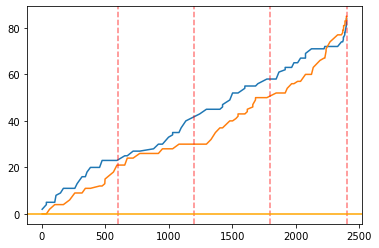

In [26]:
fig, ax = plt.subplots()
x = pontuacao['Tempo']
y = pontuacao[['placar_casa', 'placar_visitante']]
ax.plot(x, y)
for x in quartos:
    plt.axvline(x, color='red', label=pontuacao.index, linestyle='--', alpha=0.5)
plt.axhline(0, color='orange', label=pontuacao.index)

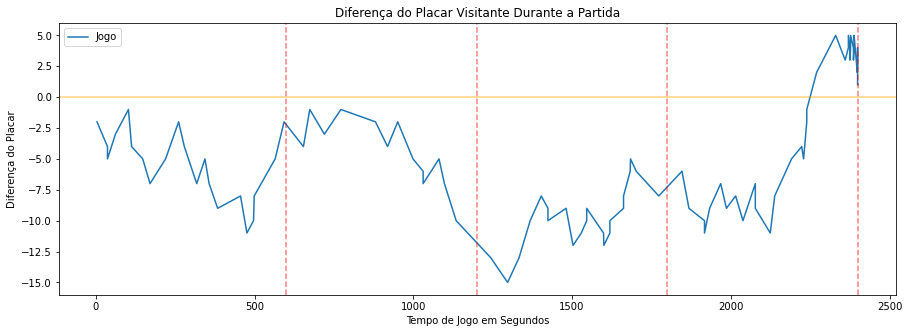

In [27]:
plt.figure(figsize=(15,5))
plt.plot(pontuacao['Tempo'], pontuacao['diferenca_placar_visitante'], label = 'Jogo')
plt.title('Diferença do Placar Visitante Durante a Partida')
plt.xlabel('Tempo de Jogo em Segundos')
plt.ylabel('Diferença do Placar')
plt.legend(loc='upper left')
for x in quartos:
    plt.axvline(x, color='red', label=pontuacao.index, linestyle='--', alpha=0.5)
plt.axhline(0, color='orange', label=pontuacao.index, alpha=0.5)

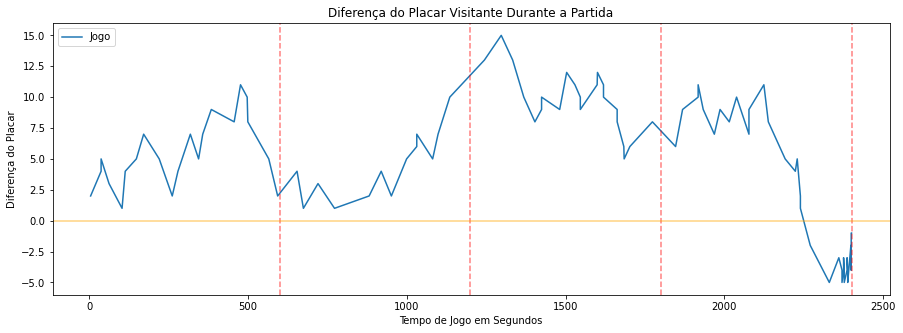

In [28]:
plt.figure(figsize=(15,5))
plt.plot(pontuacao['Tempo'], pontuacao['diferenca_placar_casa'], label = 'Jogo')
plt.title('Diferença do Placar Visitante Durante a Partida')
plt.xlabel('Tempo de Jogo em Segundos')
plt.ylabel('Diferença do Placar')
plt.legend(loc='upper left')
for x in quartos:
    plt.axvline(x, color='red', label=pontuacao.index, linestyle='--', alpha=0.5)
plt.axhline(0, color='orange', label=pontuacao.index, alpha=0.5)

In [29]:
# Criar um novo dataFrame para análisar os períodos positivos dos times
data = pd.DataFrame()
data['Time'] = pontuacao['Time']
data['Indicador'] = pontuacao['Indicador']
data['diff_pontuacao'] = pontuacao['diferenca_placar_visitante']
data['Tempo'] = pontuacao['Tempo']
data

,Time,Indicador,diff_pontuacao,Tempo
0,MIN,2_Pts_C,-2,4
1,MIN,2_Pts_C,-4,37
2,MIN,LL_Pts_C,-5,37
3,BOT,2_Pts_C,-3,62
4,BOT,2_Pts_C,-1,103
...,...,...,...,...
87,MIN,3_Pts_C,2,2398
88,BOT,LL_Pts_C,3,2399
89,BOT,LL_Pts_C,4,2399
90,MIN,3_Pts_C,1,2399


In [30]:
# Utilizando a diferença do placar entre casa e visitante, aplicando diff (diferença entre as linhas) 
# e usando seu valor absoluto (abs())
# nós podemos encontrar o valor de cada indicador técnico 
data["pontuacao"] = data["diff_pontuacao"].diff()
data["pontuacao"] = data["pontuacao"].apply(lambda x: abs(x))

In [31]:
# como o primeiro valor some quando fazemos a diff e esse primeiro valor é importante pq é o primeiro ponto, nós adicionamos ele
novo_valor = data["diff_pontuacao"][0]
data.loc[0, 'pontuacao'] = novo_valor

In [32]:
data.reset_index(drop=True, inplace=True)

In [33]:
data

,Time,Indicador,diff_pontuacao,Tempo,pontuacao
0,MIN,2_Pts_C,-2,4,-2.0
1,MIN,2_Pts_C,-4,37,2.0
2,MIN,LL_Pts_C,-5,37,1.0
3,BOT,2_Pts_C,-3,62,2.0
4,BOT,2_Pts_C,-1,103,2.0
...,...,...,...,...,...
87,MIN,3_Pts_C,2,2398,3.0
88,BOT,LL_Pts_C,3,2399,1.0
89,BOT,LL_Pts_C,4,2399,1.0
90,MIN,3_Pts_C,1,2399,3.0


In [34]:
# para conseiderarmos quem é o time A e quem é o time B 
# precisamos identificar de quem é o ultimo time a ter a posse de bola
# isso infuencia dos períodos
# quando invertemos o tempo de inicio do time a para o time B
sigla_time_a = data['Time'][0]
for x in data['Time']:
    if x == sigla_time_a:
        pass
    else:
        sigla_time_b = x
        break

In [35]:
sigla_time_a

'MIN'

In [36]:
sigla_time_b

'BOT'

In [37]:
data.to_csv('tempo2.csv')

In [38]:
# esse df é usado para retirar alguns argumentos que não fazem diferença 
# na função abaixo retiramos as listas vazias que o loop gera quando o time se repete 
def remove_item(my_list,*args):
    deletar = list(args)
    for item in deletar:
        while item in my_list:
            my_list.remove(item)
    return my_list

In [39]:
# Utilizamos uma Flag para diferenciar as paradas entre os tempos iniciais de cada posse
flag = -1
# valores da ultima linha 
ultima_linha = []
# utilizado para determinar o tempo de início de cada período
tempo_a_inicio = []
tempo_b_inicio = []
# utilizado para agrupar os valores da pontuação dos times
time_a = []
time_b = []
# utilizados para somar os valores agrupados da pontuação 
soma_a = []
soma_b = []
# identificar o nome do time
nome_time_A = []
nome_time_B = []
for i in range(len(data)):
    # caso corresponda ao nome do time A
    if data['Time'][i] == sigla_time_a:
        # adiciona o valor da pontuação
        time_a.append(data['pontuacao'][i])
        ##########################################
        # pegam os valores acumulados do time B e as soma
        soma_b.append(sum(time_b))
        # zera esse valor da pontuação para não interferir na mudaça do for
        time_b = []
        # remove esses valores zerados
        soma_b = remove_item(soma_b, 0)
        if flag != 1:
            # quando chegamos na flag o pensamento é pegar o primeiro valor que apresenta no Time A
            # pega o primeiro valor do tempo de início
            tempo_a_inicio.append(data['Tempo'][i])
            # pega o primeiro valor do nome do time
            nome_time_A.append(data['Time'][i])
            flag = 1
        else:
            pass
    # caso corresponda ao nome do time B
    elif data['Time'][i] == sigla_time_b:
        # adiciona o valor da pontuação
        time_b.append(data['pontuacao'][i])
        #####################################################
        # pegam os valores acumulados do time A e as soma
        soma_a.append(sum(time_a))
        # zera esse valor da pontuação para não interferir na mudaça do for
        time_a = []
        # remove esses valores zerados
        soma_a = remove_item(soma_a, 0)
        if flag != 0:
            # quando chegamos na flag o pensamento é pegar o primeiro valor que apresenta no Time B
            # pega o primeiro valor do tempo de início
            tempo_b_inicio.append(data['Tempo'][i])
            # pega o primeiro valor do nome do time
            nome_time_B.append(data['Time'][i])
            flag = 0
        else:
            pass
    # caso corresponda ao termino da partida
    else:
        # caso chegue no final da linha os valores são armazenados 
        ultima_linha = data['Tempo'][i]
        # aplicamos as ultimas somas  para cada time
        soma_b.append(sum(time_b))
        soma_a.append(sum(time_a))
        # e removemos os valores que estão zerados 
        soma_a = remove_item(soma_a, 0)
        soma_b = remove_item(soma_b, 0)        

In [40]:
# caso o tamanho do inicio esteja variando  por causa dos ultimos lances relacionados ao tempo de partida 
# a gente alinha dessa forma 
if len(tempo_a_inicio) < len(tempo_b_inicio):
    tempo_a_inicio.append(ultima_linha)
    nome_time_A.append(nome_time_A[0])
    soma_a.append(np.nan)
# e acrescenta no a e agora tb acrescenta no B
elif len(tempo_a_inicio) > len(tempo_b_inicio):
    tempo_b_inicio.append(ultima_linha)
    nome_time_B.append(nome_time_B[0])
    soma_b.append(np.nan)

In [41]:
posse_de_bola_A = pd.DataFrame()
posse_de_bola_A['Time'] = nome_time_A
posse_de_bola_A['Tempo_de_Inicio'] = tempo_a_inicio
posse_de_bola_A['Tempo_de_Termino'] = tempo_b_inicio
posse_de_bola_A['Soma_Pontuacao'] = soma_a

In [42]:
posse_de_bola_A.head()

,Time,Tempo_de_Inicio,Tempo_de_Termino,Soma_Pontuacao
0,MIN,4,62,1.0
1,MIN,113,220,6.0
2,MIN,279,344,5.0
3,MIN,357,456,4.0
4,MIN,476,497,3.0


In [43]:
# o fim do tempo b é o início do tempo A, pq a troca de bola é alternada
del(tempo_a_inicio[0])
tempo_a_inicio.append(np.nan)

In [44]:
posse_de_bola_B = pd.DataFrame()
posse_de_bola_B['Time'] = nome_time_B
posse_de_bola_B['Tempo_de_Inicio'] = tempo_b_inicio
posse_de_bola_B['Tempo_de_Termino'] = tempo_a_inicio
posse_de_bola_B['Soma_Pontuacao'] = soma_b

In [45]:
posse_de_bola_B.head()

,Time,Tempo_de_Inicio,Tempo_de_Termino,Soma_Pontuacao
0,BOT,62,113.0,4.0
1,BOT,220,279.0,5.0
2,BOT,344,357.0,2.0
3,BOT,456,476.0,1.0
4,BOT,497,654.0,9.0


In [46]:
jogoooo = pd.concat([posse_de_bola_A, posse_de_bola_B], ignore_index=True)

In [47]:
jogoooo.sort_values(by='Tempo_de_Inicio', ignore_index=True, inplace=True)

In [48]:
jogoooo["diff_pontuacao"] = jogoooo["Pontuacao"].diff()

KeyError: 'Pontuacao'

In [ ]:
jogoooo.head()

In [ ]:
periodos_posteriores = []
for i in range(len(jogoooo)):
    if jogoooo['Pontuacao'][i] >= 5:
        periodo_potencial_a_positivo = 1
    else:
        if (jogoooo['diff_pontuacao'][i] <= -4) & (jogoooo['Pontuacao'][i] < 3):
            periodos_posteriores.append(jogoooo['Tempo_de_Inicio'][i])
            if periodo_potencial_a_positivo == 1:
                periodo_potencial_a_positivo = 0
            elif periodo_potencial_a_positivo != 1:
                periodo_potencial_a_positivo = 0

In [ ]:
periodos_posteriores

In [ ]:
novo_jogo = jogoooo[~jogoooo['Tempo_de_Inicio'].isin(periodos_posteriores)]
novo_jogo.reset_index(inplace=True, drop=True)

In [ ]:
novo_jogo.head()

In [ ]:
flag = -1
tempo_a_peridodo_inicial = []
tempo_b_peridodo_inicial = []
tempo_a_peridodo_final = []
tempo_b_peridodo_final = []
pontuação_a = []
pontuação_b = []
nome_time_A = []
nome_time_B = []
# como o time do flamengo começa, o time de minas não apresenta o primeiro valor
# por causa disso é acrescentado um valor 0 que não existe 
potencial_final_periodo_a = 0
potencial_final_periodo_b = 0

for i in range(len(novo_jogo)):
    if novo_jogo['Time'][i] == sigla_time_a:
        if flag != 1:
            potencial_final_periodo_a = novo_jogo['Tempo_de_Termino'][i]
            tempo_a_peridodo_inicial.append(novo_jogo['Tempo_de_Inicio'][i])
            nome_time_A.append(novo_jogo['Time'][i])
            pontuação_a.append(novo_jogo['Pontuacao'][i])
            ##################################################################
            tempo_b_peridodo_final.append(potencial_final_periodo_b)
            flag = 1
        else:
            potencial_final_periodo_a = novo_jogo['Tempo_de_Termino'][i]
            flag = 1
    else:
        if flag != 0:
            tempo_a_peridodo_final.append(potencial_final_periodo_a)
            ############################################################
            potencial_final_periodo_b = novo_jogo['Tempo_de_Termino'][i]
            tempo_b_peridodo_inicial.append(novo_jogo['Tempo_de_Inicio'][i])
            nome_time_B.append(novo_jogo['Time'][i])
            pontuação_b.append(novo_jogo['Pontuacao'][i])
            flag = 0
        else:
            potencial_final_periodo_b = novo_jogo['Tempo_de_Termino'][i]
            flag = 0

In [ ]:
periodos_A = pd.DataFrame()
periodos_A['Time'] = nome_time_A
periodos_A['Tempo_de_Inicio'] = tempo_a_peridodo_inicial
periodos_A['Tempo_de_Termino'] = tempo_a_peridodo_final
periodos_A['Pontuacao'] = pontuação_a

In [ ]:
periodos_A.head()

In [ ]:
# o fim do tempo b é o início do tempo A, pq a troca de bola é alternada 
fim_b = tempo_b_peridodo_final
del(fim_b[0])
fim_b.append(np.nan)

In [ ]:
periodos_B = pd.DataFrame()
periodos_B['Time'] = nome_time_B
periodos_B['Tempo_de_Inicio'] = tempo_b_peridodo_inicial
periodos_B['Tempo_de_Termino'] = tempo_b_peridodo_final
periodos_B['Pontuacao'] = pontuação_b

In [ ]:
periodos_B.head()

In [ ]:
periodo = pd.concat([periodos_A, periodos_B], ignore_index=True)

In [ ]:
periodo.sort_values(by='Tempo_de_Inicio', ignore_index=True, inplace=True)

In [ ]:
periodo

In [ ]:
final = periodo.loc[(periodo['Pontuacao'] >=5) & (periodo['Time'] == sigla_time_a)]

In [ ]:
final

In [ ]:
final_i = list(final['Tempo_de_Inicio'])
final_f = list(final['Tempo_de_Termino'])

In [ ]:
final_i

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(pontuacao['Tempo'], pontuacao['dif_visitante'], label = 'Jogo')
plt.xlabel('Tempo de Jogo em Segundos')
plt.ylabel('Diferença do Placar')
plt.legend(loc='upper left')
for x in final_i:
    plt.axvline(x, color='red', label=pontuacao.index, linestyle='--', alpha=0.5)
for x in final_f:
    plt.axvline(x, color='green', label=pontuacao.index, linestyle='--', alpha=0.5)

In [ ]:
aaa

In [ ]:
soma_a = []
time_a = []
time_b = []
soma_b = []
for i in range(len(data)):
    if jogoooo['Time'][i] == 'FLA':
        time_a.append(data['pontuacao'][i])
        soma_b.append(sum(time_b))
        time_b = []
        soma_b = remove_item(soma_b, 0)
    elif jogoooo['Time'][i] == 'MIN':
        time_b.append(data['pontuacao'][i])
        soma_a.append(sum(time_a))
        time_a = []
        soma_a = remove_item(soma_a, 0)
    else:
        soma_b.append(sum(time_b))
        soma_a.append(sum(time_a))
        soma_a = remove_item(soma_a, 0)
        soma_b = remove_item(soma_b, 0)

In [ ]:
len(soma_a)

In [ ]:
data.to_csv('tempo2.csv')

In [ ]:
# Criar uma função que sinaliza quando tem um período positivo e negativo na diferença do placar

In [ ]:
def positivo_negativo(data):
    periodo_positivo = []
    periodo_negativo = []
    flag = -1
    
    for i in range(len(data)):
        if data['media_movel_3'][i] > data['media_movel_6'][i]:
            if flag != 1:
                periodo_positivo.append(data['pontuacao'][i])
                periodo_negativo.append(np.nan)
                flag = 1
            else:
                periodo_positivo.append(np.nan)
                periodo_negativo.append(np.nan)
        elif data['media_movel_3'][i] < data['media_movel_6'][i]:
            if flag != 0:
                periodo_positivo.append(np.nan)
                periodo_negativo.append(data['pontuacao'][i])
                flag = 0
            else:
                periodo_positivo.append(np.nan)
                periodo_negativo.append(np.nan)
        else:
            periodo_positivo.append(np.nan)
            periodo_negativo.append(np.nan)

    return (periodo_positivo, periodo_negativo)            

In [ ]:
positivo_negativo = positivo_negativo(data)
data['periodo_positivo'] = positivo_negativo[0]
data['periodo_negativo'] = positivo_negativo[1]

In [ ]:
data.head(10)

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(data['Tempo'], data['media_movel_3'], label='Jogo_Média_3', alpha=0.35)
plt.plot(data['Tempo'], data['media_movel_6'], label='Jogo_Média_6', alpha=0.35)
plt.scatter(data['Tempo'], data['periodo_positivo'], label='Positivo', marker='^', color='blue')
plt.scatter(data['Tempo'], data['periodo_negativo'], label='Negativo', marker='+', color='red')
plt.title('Diferença do Placar Visitante Durante a Partida')
plt.xlabel('Tempo de Jogo em Segundos')
plt.ylabel('Diferença do Placar')
plt.legend(loc='upper left')
for x in quartos:
    plt.axvline(x, color='red', label=pontuacao.index, linestyle='--', alpha=0.5)
plt.axhline(0, color='orange', label=pontuacao.index, alpha=0.5)

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(data['Tempo'], data['pontuacao'], label='Jogo', alpha=0.35)
#plt.plot(data['Tempo'], data['media_movel_3'], label='Jogo_Média_3', alpha=0.35)
#plt.plot(data['Tempo'], data['media_movel_6'], label='Jogo_Média_6', alpha=0.35)
#plt.scatter(data['Tempo'], data['periodo_positivo'], label='Positivo', marker='^', color='blue')
#plt.scatter(data['Tempo'], data['periodo_negativo'], label='Negativo', marker='+', color='red')
plt.title('Diferença do Placar Visitante Durante a Partida')
plt.xlabel('Tempo de Jogo em Segundos')
plt.ylabel('Diferença do Placar')
plt.legend(loc='upper left')
for x in quartos:
    plt.axvline(x, color='red', label=pontuacao.index, linestyle='--', alpha=0.5)
plt.axhline(0, color='orange', label=pontuacao.index, alpha=0.5)

mudar a marcação. Deixar o traço com a cor e não um marcador (mais fácil para vizualizar)

In [ ]:
porcentagem_valor_anterior = pd.DataFrame()
porcentagem_valor_anterior['porcentagem_da_dif'] = round(pontuacao['dif_visitante'].pct_change(), 2)

In [ ]:
diferenca_linhas = pd.DataFrame()
diferenca_linhas['diferenca_linhas'] = pontuacao['dif_visitante'].diff(3)

In [ ]:
data['porcentagem_da_dif'] = porcentagem_valor_anterior['porcentagem_da_dif']
data['diferenca_linhas'] = diferenca_linhas['diferenca_linhas']

In [ ]:
data

In [ ]:
a = []

In [ ]:
for x in data['diferenca_linhas']:
    if (x >= 3) | (x <= -3):
        a.append(x)
    else:
        a.append(np.nan)

In [ ]:
data['aaa'] = a

In [ ]:
data

In [ ]:
data.to_csv('tempo2.csv')

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(data['Tempo'], data['pontuacao'], label='Jogo', alpha=0.35)
plt.scatter(data['Tempo'], data['aaa'], label='Positivo', marker='x', color='green')
plt.scatter(data['Tempo'], data['periodo_positivo'], label='Positivo', marker='^', color='blue')
plt.scatter(data['Tempo'], data['periodo_negativo'], label='Negativo', marker='+', color='red')
plt.title('Diferença do Placar Visitante Durante a Partida')
plt.xlabel('Tempo de Jogo em Segundos')
plt.ylabel('Diferença do Placar')
plt.legend(loc='upper left')
for x in quartos:
    plt.axvline(x, color='red', label=pontuacao.index, linestyle='--', alpha=0.5)
plt.axhline(5, color='orange', label=pontuacao.index, alpha=0.5)

# Analie da Posse de Bola dos times

Estava trabalahndo nela, mas acabei parando 

In [ ]:
posse_bola = df[(df['Indicador'] == '3_Pts_C') | (df['Indicador'] == '3_Pts_T') | 
                (df['Indicador'] == '2_Pts_C') | (df['Indicador'] == '2_Pts_C') |
                (df['Indicador'] == 'LL_Pts_C') | (df['Indicador'] == 'LL_Pts_C') |
                (df['Indicador'] == 'ER') | (df['Indicador'] == 'fim_quarto') |
                (df['Indicador'] == 'inicio_partida') | (df['Indicador'] == 'inicio_quarto') |
               

In [ ]:
posse_bola["diferenca"] = posse_bola["Tempo"].diff(-1)

In [ ]:
posse_bola.to_csv('tempo2.csv')

In [ ]:
filtro = (posse_bola['diferenca'] >= 1) | (posse_bola['Indicador'] == 'inicio_partida') | (posse_bola['Indicador'] == 'fim_quarto')
valor_posse_bola = posse_bola[filtro]

In [ ]:
valor_posse_bola

In [ ]:
valor_posse_bola.to_csv('valor_posse_bola.csv')

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(valor_posse_bola['Tempo'], valor_posse_bola['diferenca'])

In [ ]:
Flamengo = df.query("Time == 'FLA'")

In [ ]:
placar_flamengo = Flamengo[(Flamengo['Indicador'] == '3_Pts_C') | (Flamengo['Indicador'] == '3_Pts_T') | 
                (Flamengo['Indicador'] == '2_Pts_C') | (Flamengo['Indicador'] == '2_Pts_C') |
                (Flamengo['Indicador'] == 'LL_Pts_C') | (Flamengo['Indicador'] == 'LL_Pts_C')]

In [ ]:
placar_flamengo

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(data=placar_flamengo, x="Tempo", y="placar_casa")

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(data=placar_flamengo, x="Tempo", y="placar_visitante")

In [ ]:
Flamengo = df.query("Time == 'FLA'").sort_values(by=['Tempo'])

In [ ]:
placar_flamengo = Flamengo[(Flamengo['Indicador'] == '3_Pts_C') | (Flamengo['Indicador'] == '3_Pts_T') | 
                (Flamengo['Indicador'] == '2_Pts_C') | (Flamengo['Indicador'] == '2_Pts_C') |
                (Flamengo['Indicador'] == 'LL_Pts_C') | (Flamengo['Indicador'] == 'LL_Pts_C')]

In [ ]:
placar_flamengo.set_index("Tempo", inplace=True)

In [ ]:
placar_flamengo_valor = placar_flamengo['placar_casa']

In [ ]:
placar_flamengo_valor

In [ ]:
plt.figure(figsize=(15,5))
flamengo_media_movel = placar_flamengo_valor.plot()

In [ ]:
flamengo_media_movel = placar_flamengo_valor.rolling(window=10).mean()

In [ ]:
flamengo_media_movel

In [ ]:
flamengo_dev_pad = placar_flamengo_valor.rolling(window=10).std()

In [ ]:
flamengo_dev_pad

In [ ]:
under_line = (flamengo_media_movel-flamengo_dev_pad)
over_line = (flamengo_media_movel+flamengo_dev_pad)

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(flamengo_media_movel, linewidth=2)
plt.fill_between(flamengo_dev_pad, under_line, over_line, color='b', alpha=.1) #std curves.

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(flamengo_media_movel, linewidth=2) #mean curve.
plt.fill_between(flamengo_dev_pad.index, under_line, over_line, color='b', alpha=.1) #std curves.